Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_28 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_29 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
activation_30 (Activation)   (None, 16, 16, 96)       

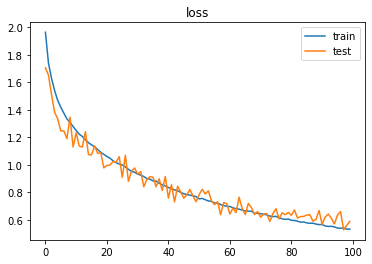

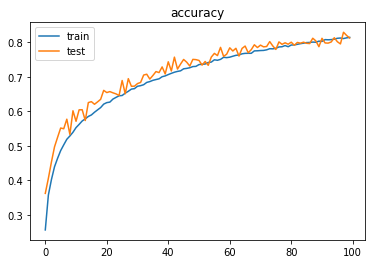

In [0]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from getdatasets import getCifar10Data
from cifar10_model import cifar10_model
from utilities import cifar10_augment
from keras.optimizers import Adam
def train_cifar10(x_train, y_train, x_test, y_test,augmentData, model):
  model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-4), metrics = ['accuracy']) 

  trainingResult = model.fit_generator(augmentData.flow(x_train, y_train, batch_size = 32), steps_per_epoch = len(x_train) / 32, 
  epochs = 100, validation_data= (x_test, y_test), callbacks=[augmented_checkpoint], verbose=1)
  return trainingResult

def evaluate_cifar10(x_test, y_test, model):
  scores = model.evaluate(x_test, y_test, verbose=0)
  print("Accuracy: %.2f%%" % (scores[1]*100))
  return scores
def saveModel():
  return ModelCheckpoint('augmented_best_model.h5', monitor='val_loss', verbose=0,save_best_only= True, mode='auto') 
                            
if __name__ == '__main__':
  x_train, y_train, x_test, y_test = getCifar10Data()
  model = cifar10_model()
  model.summary()
  augmentData = cifar10_augment(x_train)
  augmented_checkpoint= saveModel()
  trainingResult= train_cifar10(x_train, y_train, x_test, y_test,augmentData,model)
  testResult = evaluate_cifar10(x_test, y_test, model)
  plt.plot(trainingResult.history['loss'])
  plt.plot(trainingResult.history['val_loss'])
  plt.legend(['train','test'])
  plt.title('loss')
  plt.figure()
  plt.plot(trainingResult.history['acc'])
  plt.plot(trainingResult.history['val_acc'])
  plt.legend(['train','test'])
  plt.title('accuracy')